In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['best_seller_percentage'] = crosstab[True] / crosstab.sum(axis=1) * 100
crosstab_sorted = crosstab.sort_values('best_seller_percentage', ascending=False)
crosstab_sorted

isBestSeller,False,True,best_seller_percentage
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


No, no hay categorias que prevalece el Best Seller.

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared: {chi2_statistic:.2f}")
print(f"P-value: {chi2_p_value:.4f}")

(50603.56501614783, 0.0)

Hay una relación entre ellos ya que chi2 p_value es zero.

In [7]:
# Cálculo de Cramér's V
n = crosstab.values.sum()
min_dim = min(crosstab.shape) - 1
cramers_v = np.sqrt(chi2_statistic / (n * min_dim))


print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1018



3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [21]:
top10_best_seller_percentage = crosstab_sorted.head(10)

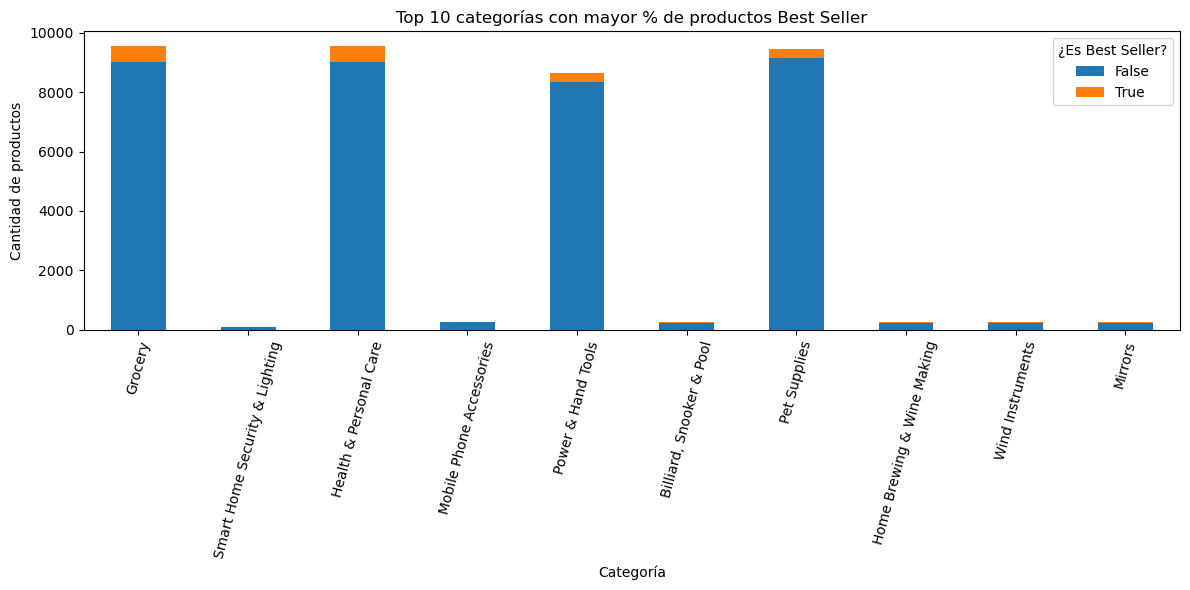

In [22]:
top10_counts_only = top10_best_seller_percentage.drop(columns='best_seller_percentage')

top10_counts_only.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Top 10 categorías con mayor % de productos Best Seller')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de productos')
plt.legend(title='¿Es Best Seller?')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [23]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

C:\Users\polur\AppData\Local\Temp\ipykernel_12408\2231332420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")


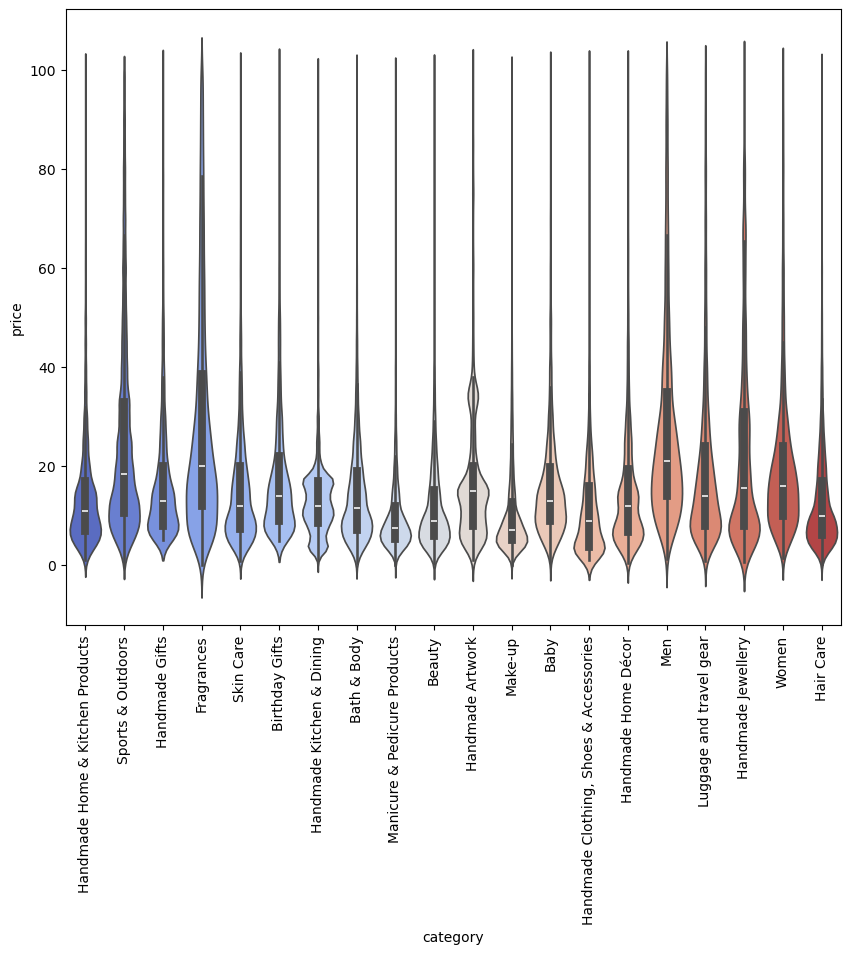

In [24]:
top_20 = df_clean['category'].value_counts().head(20).index

df_top = df_clean[df_clean['category'].isin(top_20)]

plt.figure(figsize=(10, 8))
sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()


In [29]:
median_prices = df.groupby('category')['price'].median()
highest_median_price = median_prices.max()
highest_median_category = median_prices.idxmax()
highest_median_category

'Laptops'

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

C:\Users\polur\AppData\Local\Temp\ipykernel_12408\1493524599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="Set3")


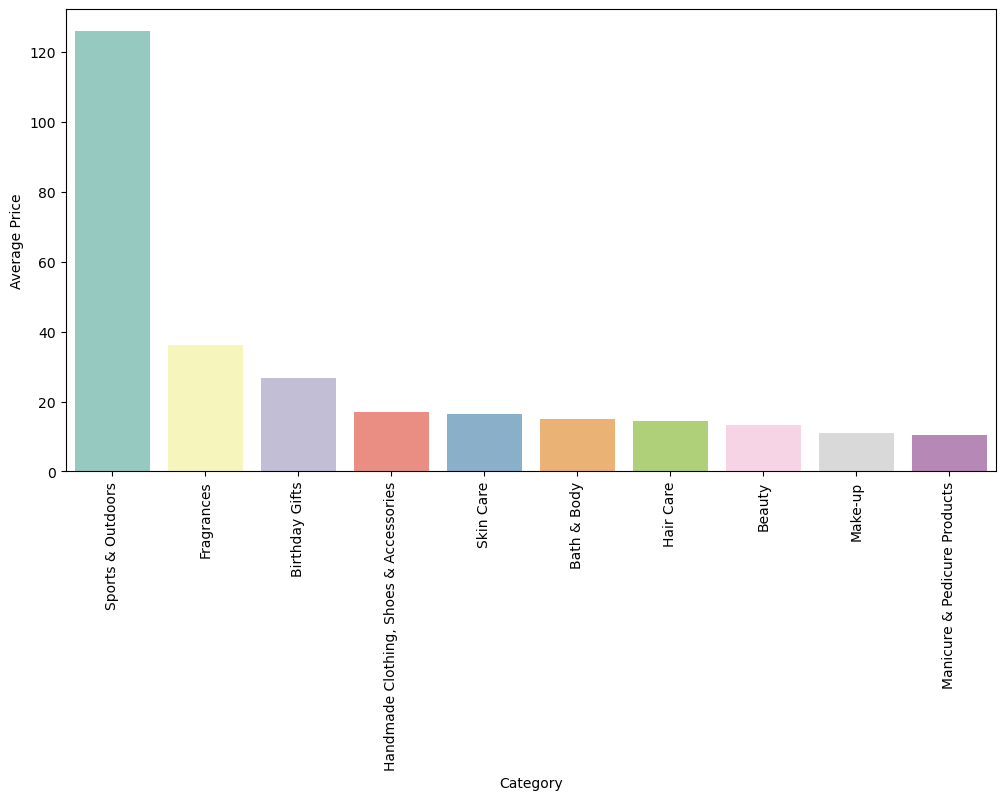

In [30]:
top_10 = df['category'].value_counts().head(10).index

df_top10 = df[df['category'].isin(top_10)]


avg_price = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette="Set3")
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

La mayor media de precios para el top 10 productos es para la categoria de Sports & Outdoors

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\polur\AppData\Local\Temp\ipykernel_12408\1102713513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette='Set3')


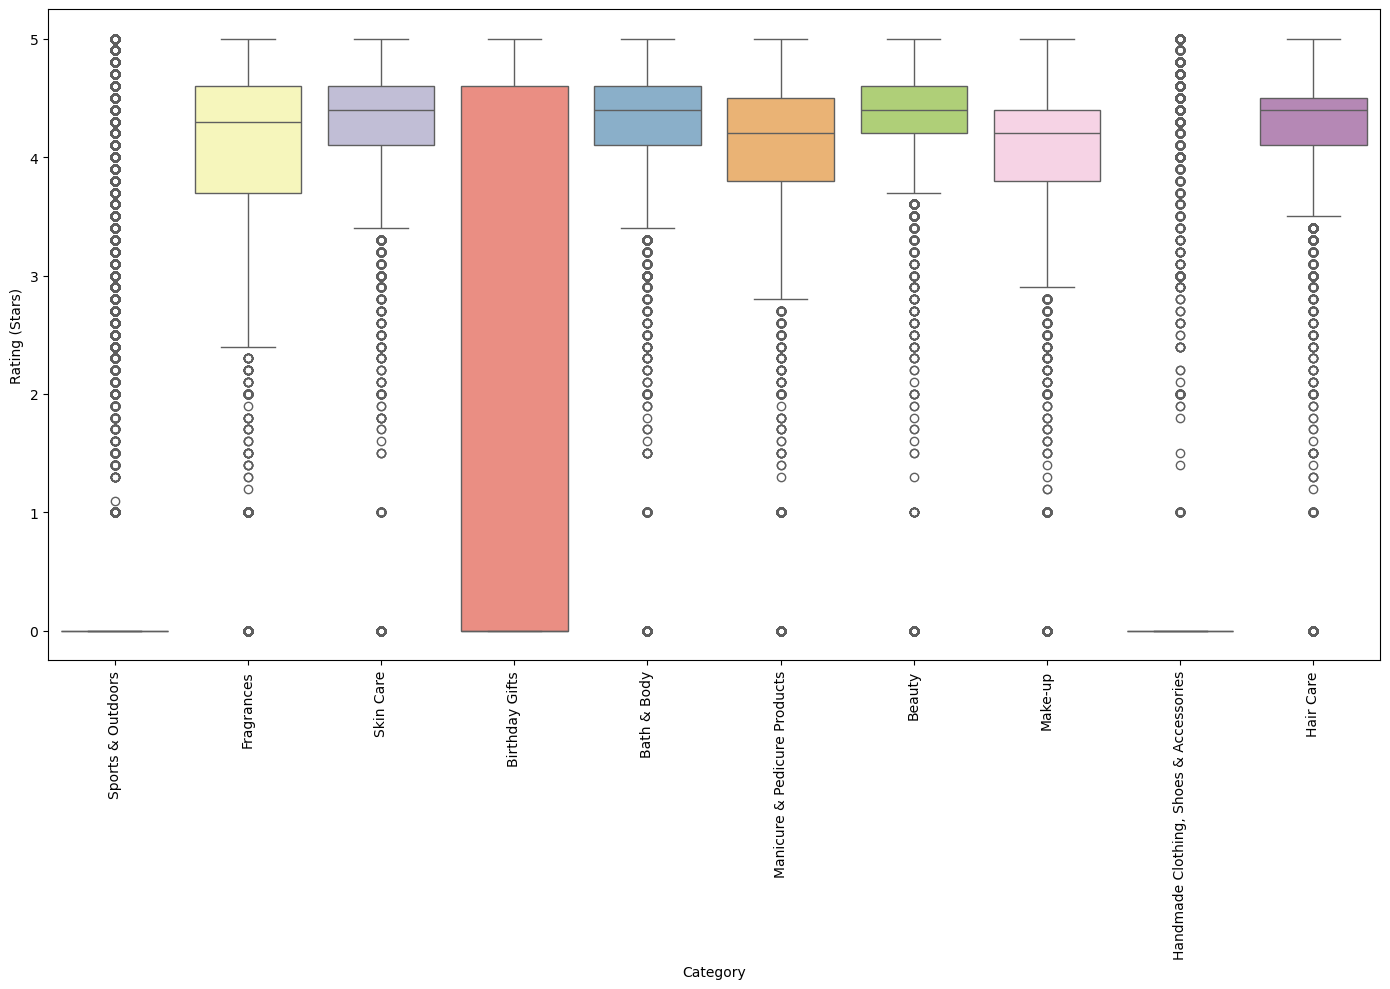

In [31]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_top10, x='category', y='stars', palette='Set3')
plt.ylabel('Rating (Stars)')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()
highest_median_category,highest_median_rating

('Computer Memory', 4.7)

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	

In [13]:
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262159059

La correlacion es negativa, eso nos dice que cuando el precio sube la calificación baja pero muy poco, eso nos idica que no hay mucha relación entre el precio del producto y su calificación.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


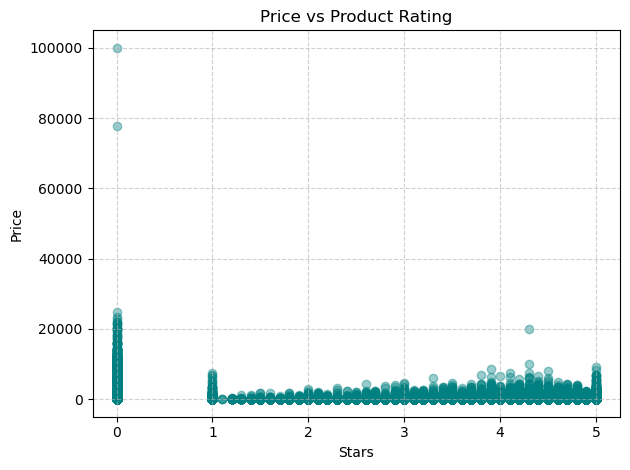

In [14]:
import matplotlib.pyplot as plt


plt.scatter(df['stars'], df['price'], alpha=0.4, color='teal')
plt.title('Price vs Product Rating')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

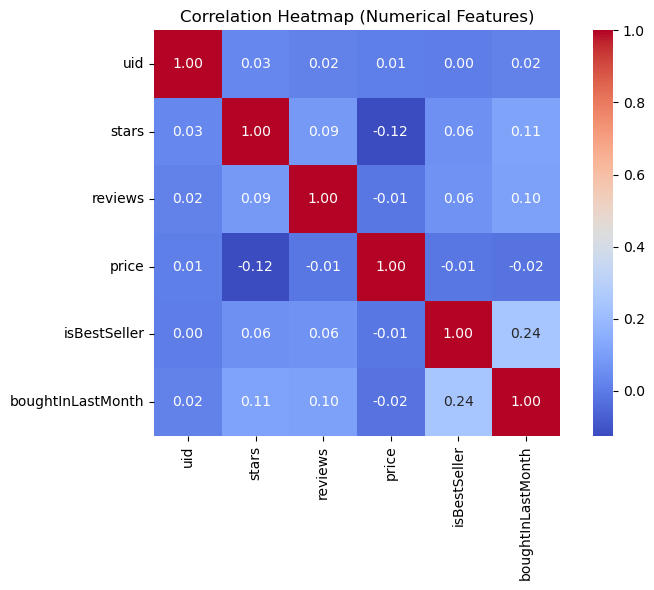

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

In [16]:
df_95 = df['price'].quantile(0.95)
df_to_95 = df[df['price'] <= df_95]

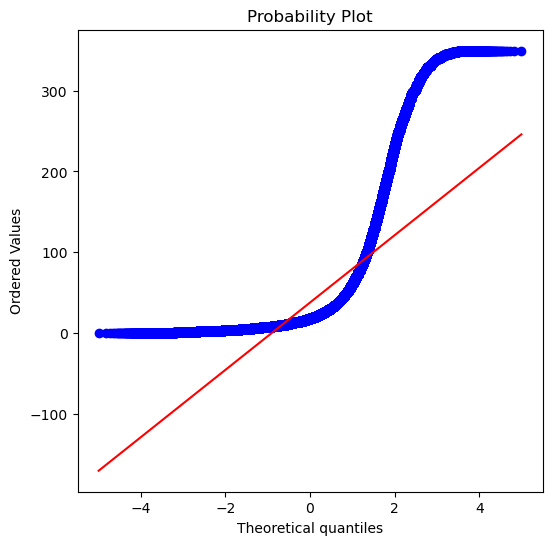

In [17]:
from scipy import stats

plt.figure(figsize=(6, 6))
stats.probplot(df_to_95['price'], dist="norm", plot=plt)

plt.show()